In [1]:
from pylab import *
import matplotlib.pyplot as plt
import os
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

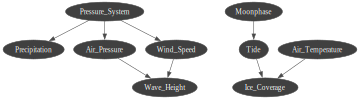

In [17]:
# Initialize the Bayesian Network
bn = gum.BayesNet('Weather_Marine_BN')

# Add nodes with explicit labels
bn.add(gum.LabelizedVariable('Pressure_System', 'High or Low Pressure System', ['High', 'Low']))
bn.add(gum.LabelizedVariable('Air_Pressure', 'Air Pressure', ['High', 'Medium', 'Low']))
bn.add(gum.LabelizedVariable('Wind_Speed', 'Wind Speed', ['Low', 'Medium', 'High']))
bn.add(gum.LabelizedVariable('Precipitation', 'Precipitation', ['No', 'Yes']))
bn.add(gum.LabelizedVariable('Wave_Height', 'Wave Height', ['Low', 'Medium', 'High']))
bn.add(gum.LabelizedVariable('Moonphase', 'Moonphase', ['Phase0', 'Phase1', 'Phase2', 'Phase3', 'Phase4', 'Phase5', 'Phase6', 'Phase7']))
bn.add(gum.LabelizedVariable('Tide', 'Tide', ['Low', 'Medium', 'High']))
bn.add(gum.LabelizedVariable('Air_Temperature', 'Air Temperature', ['Low', 'Medium', 'High']))
bn.add(gum.LabelizedVariable('Ice_Coverage', 'Ice Coverage', ['Low', 'Medium', 'High']))

# Define arcs (dependencies)
bn.addArc('Pressure_System', 'Air_Pressure')
bn.addArc('Pressure_System', 'Wind_Speed')
bn.addArc('Pressure_System', 'Precipitation')
bn.addArc('Air_Pressure', 'Wave_Height')
bn.addArc('Wind_Speed', 'Wave_Height')
bn.addArc('Moonphase', 'Tide')
bn.addArc('Tide', 'Ice_Coverage')
bn.addArc('Air_Temperature', 'Ice_Coverage')

# # Define CPTs

# # Pressure_System CPT
# bn.cpt('Pressure_System').fillWith([0.6, 0.4])  # High:0.6, Low:0.4

# # Air_Pressure CPT
# bn.cpt('Air_Pressure')[:, 'High'] = [0.7, 0.2]     # P(Air_Pressure=High | High) = 0.7, | Low) = 0.2
# bn.cpt('Air_Pressure')[:, 'Medium'] = [0.2, 0.6]   # P(Air_Pressure=Medium | High) = 0.2, | Low) = 0.6
# bn.cpt('Air_Pressure')[:, 'Low'] = [0.1, 0.2]      # P(Air_Pressure=Low | High) = 0.1, | Low) = 0.2

# # Wind_Speed CPT
# bn.cpt('Wind_Speed')[:, 'Low'] = [0.8, 0.3]        # P(Wind_Speed=Low | High) = 0.8, | Low) = 0.3
# bn.cpt('Wind_Speed')[:, 'Medium'] = [0.15, 0.4]    # P(Wind_Speed=Medium | High) = 0.15, | Low) = 0.4
# bn.cpt('Wind_Speed')[:, 'High'] = [0.05, 0.3]      # P(Wind_Speed=High | High) = 0.05, | Low) = 0.3

# # Precipitation CPT
# bn.cpt('Precipitation')[:, 'No'] = [0.9, 0.4]     # P(Precipitation=No | High) = 0.9, | Low) = 0.4
# bn.cpt('Precipitation')[:, 'Yes'] = [0.1, 0.6]    # P(Precipitation=Yes | High) = 0.1, | Low) = 0.6

# # Wave_Height CPT
# bn.cpt('Wave_Height')['Wind_Speed=Low', :] = [0.9, 0.1, 0.0]      # Low Wind: Low Wave:0.9, Medium:0.1, High:0.0
# bn.cpt('Wave_Height')['Wind_Speed=Medium', :] = [0.3, 0.6, 0.1]   # Medium Wind: Low:0.3, Medium:0.6, High:0.1
# bn.cpt('Wave_Height')['Wind_Speed=High', :] = [0.0, 0.3, 0.7]     # High Wind: Low:0.0, Medium:0.3, High:0.7

# # Moonphase CPT
# bn.cpt('Moonphase').fillWith([1/8] * 8)  # Uniform distribution across 8 phases

# # Tide CPT
# for phase in range(8):
#     phase_label = f'Phase{phase}'
#     if phase in [0, 4]:  # New Moon and Full Moon
#         bn.cpt('Tide')[f'Moonphase={phase_label}', :] = [0.2, 0.3, 0.5]  # Low:0.2, Medium:0.3, High:0.5
#     else:
#         bn.cpt('Tide')[f'Moonphase={phase_label}', :] = [0.3, 0.5, 0.2]  # Low:0.3, Medium:0.5, High:0.2

# # Air_Temperature CPT
# bn.cpt('Air_Temperature').fillWith([0.3, 0.5, 0.2])  # Low:0.3, Medium:0.5, High:0.2

# # Ice_Coverage CPT
# for tide in ['Low', 'Medium', 'High']:
#     for temp in ['Low', 'Medium', 'High']:
#         if temp == 'Low':
#             if tide == 'Low':
#                 bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.8, 0.15, 0.05]
#             elif tide == 'Medium':
#                 bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.6, 0.3, 0.1]
#             else:  # High
#                 bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.4, 0.4, 0.2]
#         elif temp == 'Medium':
#             if tide == 'Low':
#                 bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.5, 0.3, 0.2]
#             elif tide == 'Medium':
#                 bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.3, 0.5, 0.2]
#             else:  # High
#                 bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.1, 0.4, 0.5]
#         else:  # High Temperature
#             if tide == 'Low':
#                 bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.1, 0.3, 0.6]
#             elif tide == 'Medium':
#                 bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.0, 0.2, 0.8]
#             else:  # High
#                 bn.cpt('Ice_Coverage')[(f'Tide={tide}', f'Air_Temperature={temp}'), :] = [0.0, 0.1, 0.9]

# Visualize the Bayesian Network
gnb.showBN(bn)
